In [1]:
%reload_ext autoreload
%autoreload 2
%matplotlib inline

In [2]:
from utils import *

In [3]:
plt.rcParams['figure.figsize'] = (14,10)
font = {'family' : 'DejaVu Sans',  'weight' : 'normal',  'size'  : 22}
plt.rc('font', **font)

In [4]:
df = pd.read_csv('dataset.csv')

In [5]:
df

,filename,width,height,class,bboxes,total_bolts
0,/media/scratch/astamoulakatos/NMIS/images/2021...,4032,3024,Bolt,"[[1494, 434, 1694, 633], [396, 1137, 591, 1332...",5
1,/media/scratch/astamoulakatos/NMIS/images/2021...,4032,3024,Bolt,"[[406, 374, 611, 568], [1499, 384, 1694, 578]]",2
2,/media/scratch/astamoulakatos/NMIS/images/2021...,4032,3024,Bolt,"[[726, 859, 925, 1054], [1699, 2301, 1893, 249...",7
3,/media/scratch/astamoulakatos/NMIS/images/2021...,4032,3024,Bolt,"[[217, 2465, 416, 2665], [227, 265, 431, 459],...",5
4,/media/scratch/astamoulakatos/NMIS/images/2021...,4032,3024,Bolt,"[[1414, 429, 1614, 623]]",1
...,...,...,...,...,...,...
179,/media/scratch/astamoulakatos/NMIS/images/2021...,4032,3024,Bolt,"[[376, 2375, 571, 2570], [3410, 414, 3610, 613]]",2
180,/media/scratch/astamoulakatos/NMIS/images/2021...,4032,3024,Bolt,"[[461, 354, 656, 554], [2492, 389, 2692, 588],...",9
181,/media/scratch/astamoulakatos/NMIS/images/2021...,4032,3024,Bolt,"[[2198, 574, 2397, 774], [1195, 520, 1394, 714...",11
182,/media/scratch/astamoulakatos/NMIS/images/2021...,1512,2016,Bolt,"[[1290, 1251, 1393, 1357], [578, 143, 677, 243...",3


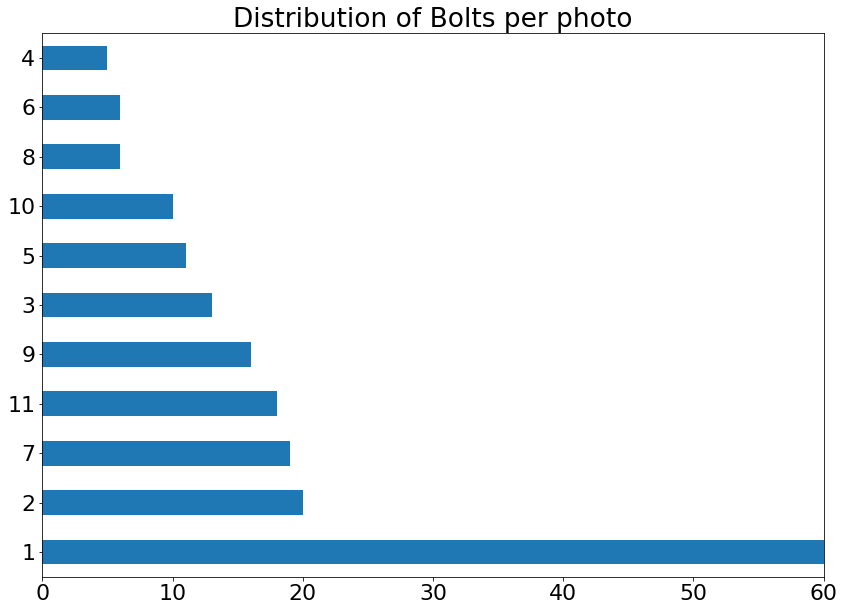

In [6]:
df.total_bolts.value_counts().plot(kind='barh')
plt.title('Distribution of Bolts per photo')
plt.xlim(0,60)
plt.show()

In [7]:
df['fold'] = -1

In [8]:
df

,filename,width,height,class,bboxes,total_bolts,fold
0,/media/scratch/astamoulakatos/NMIS/images/2021...,4032,3024,Bolt,"[[1494, 434, 1694, 633], [396, 1137, 591, 1332...",5,-1
1,/media/scratch/astamoulakatos/NMIS/images/2021...,4032,3024,Bolt,"[[406, 374, 611, 568], [1499, 384, 1694, 578]]",2,-1
2,/media/scratch/astamoulakatos/NMIS/images/2021...,4032,3024,Bolt,"[[726, 859, 925, 1054], [1699, 2301, 1893, 249...",7,-1
3,/media/scratch/astamoulakatos/NMIS/images/2021...,4032,3024,Bolt,"[[217, 2465, 416, 2665], [227, 265, 431, 459],...",5,-1
4,/media/scratch/astamoulakatos/NMIS/images/2021...,4032,3024,Bolt,"[[1414, 429, 1614, 623]]",1,-1
...,...,...,...,...,...,...,...
179,/media/scratch/astamoulakatos/NMIS/images/2021...,4032,3024,Bolt,"[[376, 2375, 571, 2570], [3410, 414, 3610, 613]]",2,-1
180,/media/scratch/astamoulakatos/NMIS/images/2021...,4032,3024,Bolt,"[[461, 354, 656, 554], [2492, 389, 2692, 588],...",9,-1
181,/media/scratch/astamoulakatos/NMIS/images/2021...,4032,3024,Bolt,"[[2198, 574, 2397, 774], [1195, 520, 1394, 714...",11,-1
182,/media/scratch/astamoulakatos/NMIS/images/2021...,1512,2016,Bolt,"[[1290, 1251, 1393, 1357], [578, 143, 677, 243...",3,-1


In [9]:
skf = StratifiedKFold(n_splits=5)

In [10]:
for fold_number, (train_index, val_index) in enumerate(skf.split(X=df['filename'], y=df['total_bolts'])):
    df.loc[df.iloc[val_index].index, 'fold'] = fold_number

In [11]:
df.fold.value_counts()

3    37
2    37
1    37
0    37
4    36
Name: fold, dtype: int64

In [12]:
df

,filename,width,height,class,bboxes,total_bolts,fold
0,/media/scratch/astamoulakatos/NMIS/images/2021...,4032,3024,Bolt,"[[1494, 434, 1694, 633], [396, 1137, 591, 1332...",5,0
1,/media/scratch/astamoulakatos/NMIS/images/2021...,4032,3024,Bolt,"[[406, 374, 611, 568], [1499, 384, 1694, 578]]",2,0
2,/media/scratch/astamoulakatos/NMIS/images/2021...,4032,3024,Bolt,"[[726, 859, 925, 1054], [1699, 2301, 1893, 249...",7,0
3,/media/scratch/astamoulakatos/NMIS/images/2021...,4032,3024,Bolt,"[[217, 2465, 416, 2665], [227, 265, 431, 459],...",5,0
4,/media/scratch/astamoulakatos/NMIS/images/2021...,4032,3024,Bolt,"[[1414, 429, 1614, 623]]",1,0
...,...,...,...,...,...,...,...
179,/media/scratch/astamoulakatos/NMIS/images/2021...,4032,3024,Bolt,"[[376, 2375, 571, 2570], [3410, 414, 3610, 613]]",2,4
180,/media/scratch/astamoulakatos/NMIS/images/2021...,4032,3024,Bolt,"[[461, 354, 656, 554], [2492, 389, 2692, 588],...",9,4
181,/media/scratch/astamoulakatos/NMIS/images/2021...,4032,3024,Bolt,"[[2198, 574, 2397, 774], [1195, 520, 1394, 714...",11,4
182,/media/scratch/astamoulakatos/NMIS/images/2021...,1512,2016,Bolt,"[[1290, 1251, 1393, 1357], [578, 143, 677, 243...",3,4


In [13]:
df.to_csv('dataset_strat.csv', index=False)